# Project Setup

In [2]:
##Setting up the project, importing libraries and getting the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('C:/Users/New PC 3/Desktop/Practice PR/spot/PROJECT GREEN/n_excel/spoty_data.xlsx')
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2FZ99j224ohiGLavqjijza,2024-05-14 20:42:07,android,910,Undertale,Toby Fox,UNDERTALE Soundtrack,fwdbtn,fwdbtn,1,1
1,0FZvr22qlD6sEJ0RDJWmvE,2024-05-14 20:42:08,android,963,Supertwister,Camel,Mirage,fwdbtn,fwdbtn,1,1
2,02ppMPbg1OtEdHgoPqoqju,2024-05-14 20:42:10,android,786,Reckoner,Radiohead,In Rainbows,fwdbtn,fwdbtn,1,1
3,1XmCjUHKK7wqOfSQeiZiUd,2024-05-14 20:42:13,android,3463,Tsitsushka,Thy Catafalque,Naiv,fwdbtn,fwdbtn,1,1
4,3cLVFyJRYkpXVVIgjiePmj,2024-05-14 20:42:14,android,1072,Dois Animais Na Selva Suja Da Rua,Erasmo Carlos,"Carlos, Erasmo",fwdbtn,fwdbtn,1,1


In [5]:
#Checking if datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65063 entries, 0 to 65062
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   spotify_track_uri  65063 non-null  object        
 1   ts                 65063 non-null  datetime64[ns]
 2   platform           65063 non-null  object        
 3   ms_played          65063 non-null  int64         
 4   track_name         65063 non-null  object        
 5   artist_name        65063 non-null  object        
 6   album_name         65062 non-null  object        
 7   reason_start       65063 non-null  object        
 8   reason_end         65063 non-null  object        
 9   shuffle            65063 non-null  int64         
 10  skipped            65063 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 5.5+ MB


In [4]:
##NOTE ABOUT DATA TYPES
#During the early versions of the project, I ran into many errors because of incompatible data types.
#I recommend converting datatypes to the one below
df["ts"] = pd.to_datetime(df["ts"])
df["ms_played"] = df["ms_played"].astype(int)             
df["track_name"] = df["track_name"].astype(str)
df["artist_name"] = df["artist_name"].astype(str)
df["album_name"] = df["album_name"].astype(str)
df["reason_start"] = df["reason_start"].astype(str)       
df["reason_end"] = df["reason_end"].astype(str)           
df["shuffle"] = df["shuffle"].astype(bool)                
df["skipped"] = df["skipped"].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65063 entries, 0 to 65062
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   spotify_track_uri  65063 non-null  object        
 1   ts                 65063 non-null  datetime64[ns]
 2   platform           65063 non-null  object        
 3   ms_played          65063 non-null  int32         
 4   track_name         65063 non-null  object        
 5   artist_name        65063 non-null  object        
 6   album_name         65063 non-null  object        
 7   reason_start       65063 non-null  object        
 8   reason_end         65063 non-null  object        
 9   shuffle            65063 non-null  bool          
 10  skipped            65063 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int32(1), object(7)
memory usage: 4.3+ MB


# Exploratory Analysis - Finding the Top Trends

In [31]:
#I started by finding Top 10 Songs by Playtime(using total ms_played)
topsongs=df.groupby(['track_name','artist_name', 'album_name']).agg({"ms_played":"sum"}).sort_values("ms_played", ascending=False).reset_index()
# I created a new column combining track name and artist name
topsongs["track_label"] = topsongs.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)
# To see top 10, I created a different variable
top10songs=topsongs.head(10)

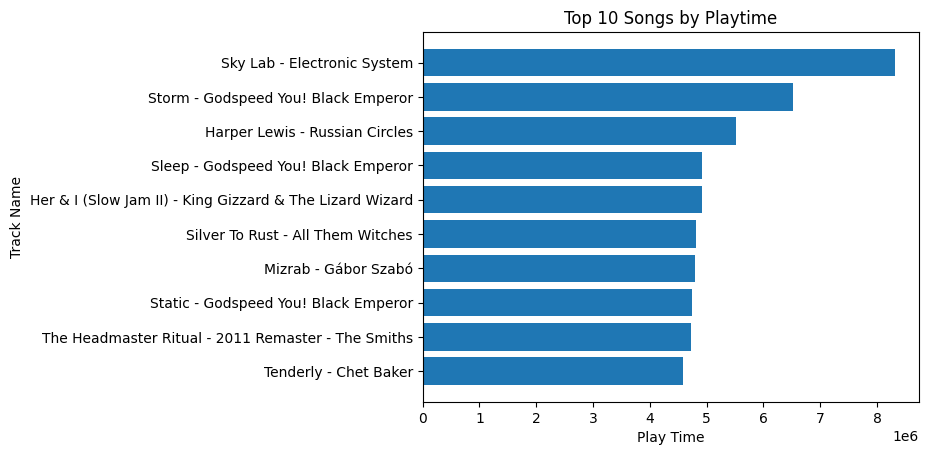

In [33]:
#Visualizin the Top 10 Songs by Playtime(using total ms_played)
x=top10songs["track_label"]
y=top10songs["ms_played"]

plt.title("Top 10 Songs by Playtime")
plt.xlabel("Play Time") 
plt.ylabel("Track Name")

plt.barh(x[::-1], y[::-1]) 
plt.show()

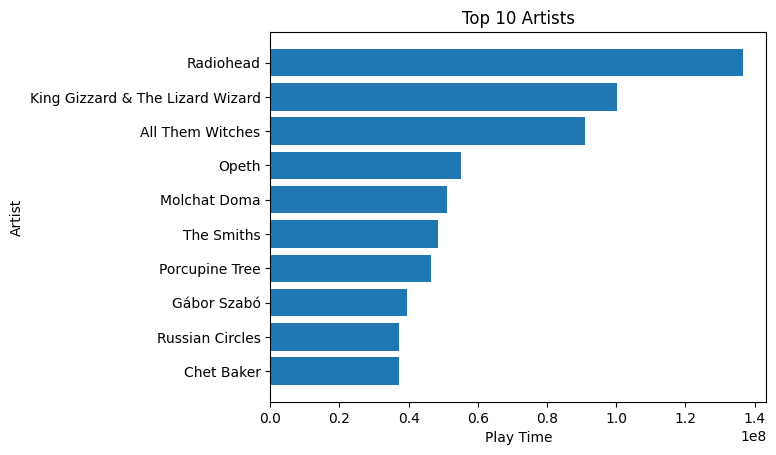

In [19]:
#Top 10 Artists by ms_played
top_artists=df.groupby(['artist_name']).agg({'ms_played':'sum'}).sort_values("ms_played", ascending=False).reset_index().head(10)
x=top_artists["artist_name"]
y=top_artists["ms_played"]

plt.title("Top 10 Artists")
plt.xlabel("Play Time") 
plt.ylabel("Artist")

plt.barh(x[::-1], y[::-1]) 
plt.show()

In [ ]:
#Interestingly, my top 2 listened song's artists aren't in my top 10 artist.

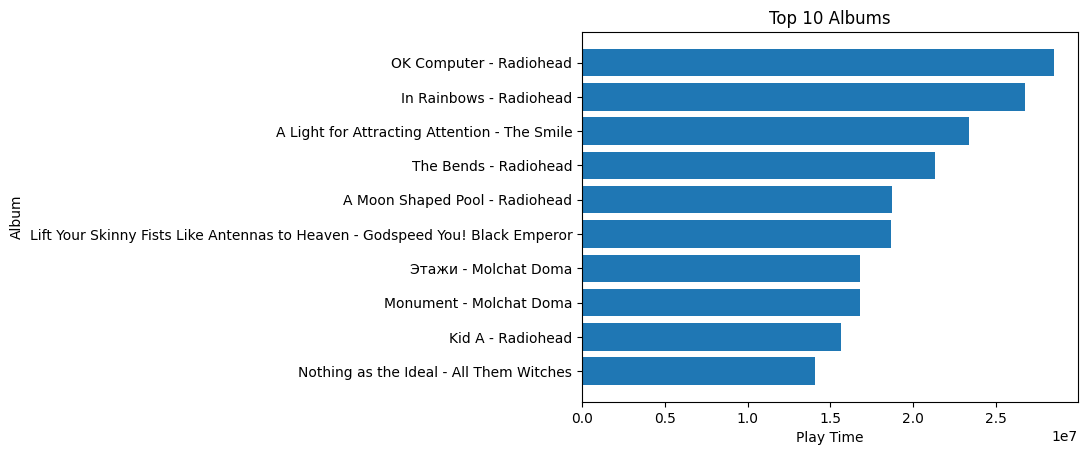

In [37]:
#Let's check top 10 albums by playtime

#Creating a top 10 album dataframe
top_albums=df.groupby(['album_name','artist_name']).agg({'ms_played':'sum'}).sort_values("ms_played", ascending=False).reset_index().head(10)

#Creating album label to show which album belongs to which artist
top_albums["album_label"] = top_albums.apply(lambda row: f"{row['album_name']} - {row['artist_name']}", axis=1)

#Visualizing Data
x=top_albums["album_label"]
y=top_albums["ms_played"]

plt.title("Top 10 Albums")
plt.xlabel("Play Time") 
plt.ylabel("Album")

plt.barh(x[::-1], y[::-1]) 
plt.show()

In [47]:
#Which songs have I played the most? How often do I skip it?
#Lets find the top track
topsong_ms=df_track.groupby(['track_label']).agg({"ms_played":"sum"}).sort_values("ms_played", ascending=False).reset_index()
topsong_ms.head(1)

,track_label,ms_played
0,Sky Lab - Electronic System,8318015


In [49]:
df[(df["track_name"]=="Sky Lab") & (df["artist_name"] == "Electronic System")]["skipped"].sum()

16

In [ ]:
#Analysis
#It looks like my favorite artists of all time are Radiohead, Godspeed You! Black Emperor, Molchat Doma and All Them Witches.
#I also tend to listen The Smile, Porcupine Tree, The Smiths, Opeth King Gizzard and the Lizard Wizard, Chet Baker, Gabor Szabo and Russian Circles regularly.
#When I like an artist, I tend to discover their discography, but Electronic System looks like an exception

# Date and Time Trends

## Yearly Trends

In [8]:
#We will extract many parts from our ts column. I don't want to overcrowd my columns, so I'm creating a dataframe copy only to seek time trends.
df_date=df.copy()

In [77]:
#Extracting Year Data from ts Column
df_date["ts"]=pd.to_datetime(df_date["ts"])
df_date['year']=df_date["ts"].dt.year

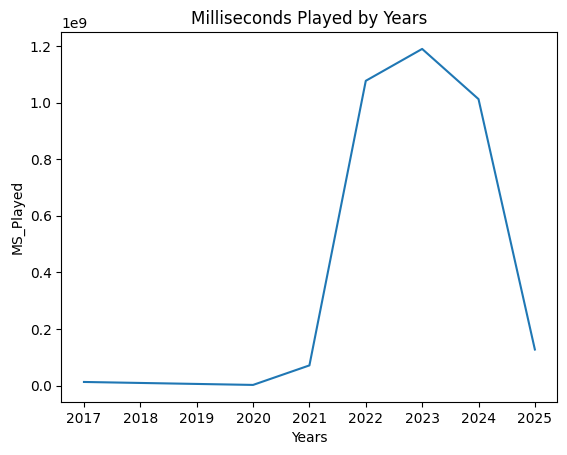

In [51]:
#Playtime by years

#Creating a dataframe which holds yearly total ms_played
yearly_playtime=df_date.groupby(["year"]).agg({"ms_played":"sum"}).reset_index()

#Visualizing the Data
x=yearly_playtime["year"]
y=yearly_playtime["ms_played"]

plt.title("Milliseconds Played by Years")
plt.xlabel("Years")
plt.ylabel("MS_Played")

plt.plot(x,y)
plt.show()

In [ ]:
#Even though the database hold data from year 2017, I started actively using the platform in 2020.
#In the first two years(2020-21), I didn't use the platform regularly.
#With the year 2021, I started using the platform regularly.
#My listening time peaked in 2022 and 2023
#It started to slow down a little bit in 2024
#This project is being done in February-March of 2025, so I only have data until the 18th of February. That's why the data is showing the 2025's listening time low.

In [57]:
#Comparing Top 10 Artists per Year

#Let's begin by creating a dataframe which holds top artists by listen time in years
dftops=df_date.groupby(["artist_name","year"]).agg({'ms_played':'sum'}).sort_values(["year","ms_played"], ascending=False).reset_index()

#In my analysis, we saw 2020-21 as the years I didn't use the platfor regularly. So I'm going to exclude them in this step.
#I will also exclude 2025 as we don't have the whole data from that year

#We will create dataframes to show top 10 artists per year
tops24=dftops[dftops["year"]==2024].head(10)
tops23=dftops[dftops["year"]==2023].head(10)
tops22=dftops[dftops["year"]==2022].head(10)

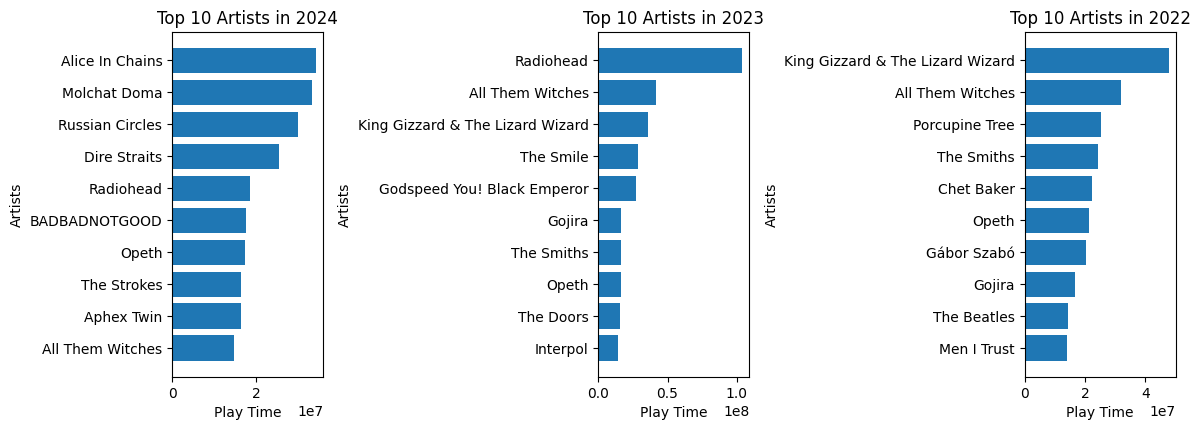

In [59]:
plt.figure(figsize=(12, 8))

datasets = [tops24, tops23, tops22]
titles = ["Top 10 Artists in 2024", "Top 10 Artists in 2023", "Top 10 Artists in 2022"]

for i, data in enumerate(datasets):
    x = data["artist_name"]
    y = data["ms_played"]

    plt.subplot(2, 3, i + 1) 
    plt.barh(x[::-1], y[::-1])
    plt.title(titles[i])
    plt.xlabel("Play Time")
    plt.ylabel("Artists")

plt.tight_layout()
plt.show()

In [ ]:
#Interestingly, every year, my top artist changes. The previous years' top artists stays in the top 10 next year.
#I have some all time favorites in many years like All Them Witches and Opeth
#I tend to add new names to top 10 artists every year.

## Monthly Trends

In [ ]:
#We can extract month name and number to see in which season I tend to listen more

In [12]:
#Extracting Month Name and Number
df_date["month_number"] = df_date["ts"].dt.month
df_date["month_name"] = df_date["ts"].dt.month_name()

In [14]:
#Grouping the monthly data into a new variable
monthly_df=df_date.groupby(["month_number","month_name"]).agg({"ms_played":"sum"}).sort_values("ms_played", ascending=False).reset_index()

In [19]:
#Creating month proper column which includes both month number and name
monthly_df["month_proper"] = monthly_df.apply(lambda row: f"{row['month_number']} - {row['month_name']}", axis=1)

In [35]:
#When we visualize, the data will not be organized. To organize it I sort the values and put it in a variable.
monthly_df2=monthly_df.sort_values("month_number", ascending=True).reset_index()

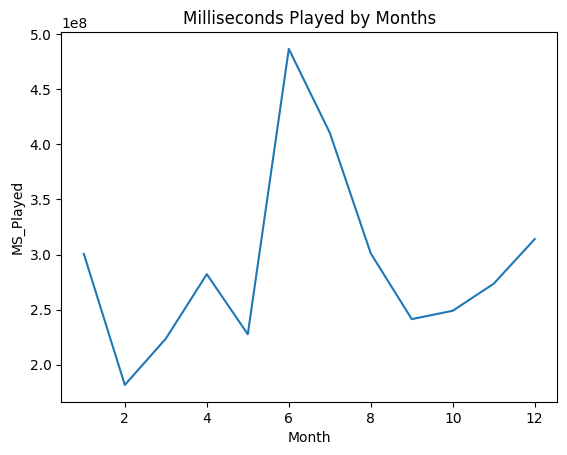

In [39]:
#Visualizing the Data
x=monthly_df2["month_number"]
y=monthly_df2["ms_played"] 

plt.title("Milliseconds Played by Months")
plt.xlabel("Month")
plt.ylabel("MS_Played")

plt.plot(x,y)
plt.show()

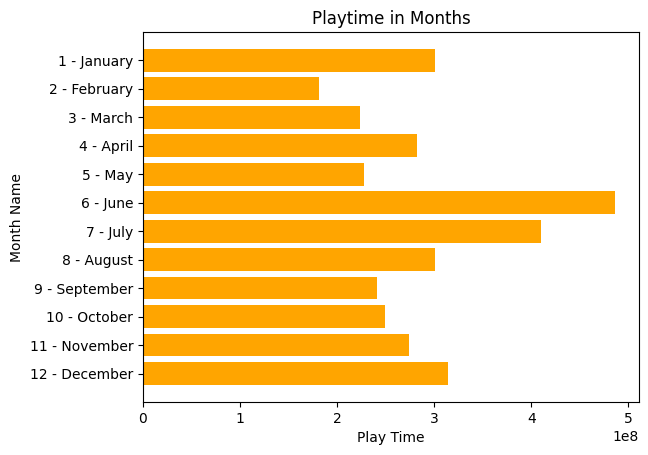

In [45]:
#Let's also see it in a bar chart
x=monthly_df2["month_proper"]
y=monthly_df2["ms_played"]

plt.title("Playtime in Months")
plt.xlabel("Play Time") 
plt.ylabel("Month Name")

plt.barh(x[::-1], y[::-1], color="orange") 
plt.show()

In [ ]:
#According to our month data, my listening time peaks in June-July and December-January
#We can roughly say that I listen to music more in Winter and Summer, I listen less in Autumn and Spring

## Weekly and Daily Trends

In [55]:
#Seeking the weekly trends, I'm looking for the days I listen to music the most
#Extracting the name of the weekday
df_date["weekday"] = df_date["ts"].dt.day_name()

In [59]:
df_date_weekly=df_date.groupby(["weekday"]).agg({"ms_played":"sum"}).sort_values(["ms_played"], ascending=False).reset_index()

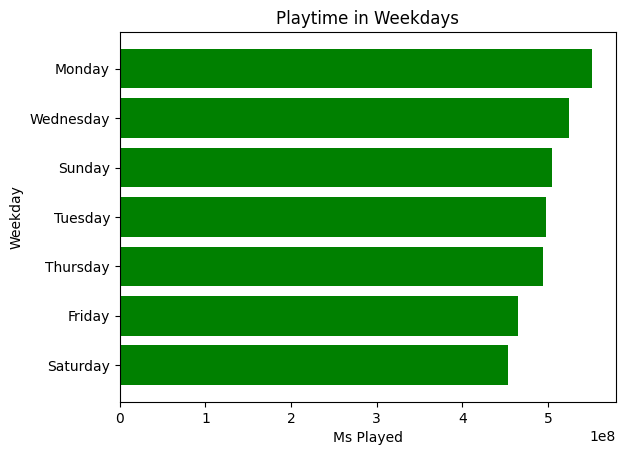

In [63]:
x=df_date_weekly["weekday"]
y=df_date_weekly["ms_played"]

plt.title("Playtime in Weekdays")
plt.xlabel("Ms Played") 
plt.ylabel("Weekday")

plt.barh(x[::-1], y[::-1], color="green") 
plt.show()

In [ ]:
#Looks like Monday, Wednesday and Sunday are my favorite days to listen to music. Tuesday and Thursday is also close. 
#I tend to listen less on Friday and Saturday

In [65]:
#Extracting date data (year-month-day)
df_date["date"] = df_date["ts"].dt.date

In [73]:
#Let's see the days with longest listen time
df_date.groupby(["date"]).agg({"ms_played":"sum"}).sort_values(["ms_played"], ascending=False).reset_index().head(10)

,date,ms_played
0,2022-06-11,21476902
1,2022-06-05,21069966
2,2022-06-03,19910306
3,2022-05-29,19539637
4,2022-06-04,17964958
5,2021-04-09,17429425
6,2022-07-05,16706512
7,2022-06-12,16244607
8,2022-06-18,16182817
9,2022-06-07,16013387


In [ ]:
#Days with longest playtime are mostly in the April-May-June-July cycle. Most of them are in June. 
#They are all in the year 2022(which is also the year with highest listen time)

In [71]:
#Let's see the days with shortest listen time
df_date.groupby(["date"]).agg({"ms_played":"sum"}).sort_values(["ms_played"], ascending=True).reset_index().head(10)

,date,ms_played
0,2022-09-18,0
1,2022-10-08,250
2,2024-07-27,844
3,2020-09-05,936
4,2020-12-05,994
5,2022-06-10,1013
6,2022-07-11,1440
7,2017-04-05,1489
8,2022-08-10,1780
9,2024-12-01,2046


In [ ]:
#We can exclude the part with least listening time

## Hourly Trends

In [87]:
#Let's extract hour data from ts column to see hourly trends
df_date["hour"]=df_date["ts"].dt.hour

In [89]:
#Grouping our hourly listening data by ms_played
df_date.groupby(["hour"]).agg({"ms_played":"sum"}).sort_values(["ms_played","hour"], ascending=False).reset_index()

,hour,ms_played
0,21,503985630
1,15,479672375
2,16,467978723
3,20,392501786
4,14,387264627
5,22,341594194
6,17,313325914
7,23,192799855
8,18,130924282
9,13,98496831


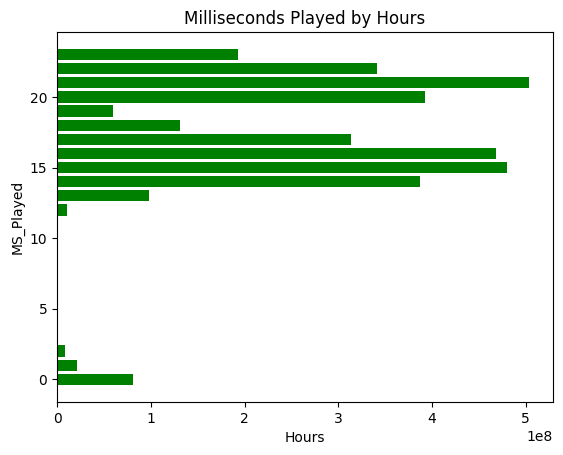

In [97]:
#Let's see the trends in a bar chart
df_hour=df_date.groupby("hour").agg({"ms_played":"sum"}).sort_values("hour", ascending=False).reset_index()
x=df_hour["hour"]
y=df_hour["ms_played"]

plt.title("Milliseconds Played by Hours")
plt.xlabel("Hours")
plt.ylabel("MS_Played")

plt.barh(x[::-1], y[::-1], color="green") 
plt.show()

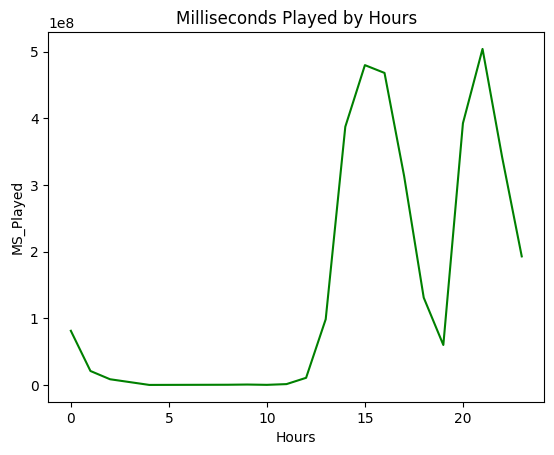

In [91]:
#Let's also see hourly trends in a line plot
x=df_hour["hour"]
y=df_hour["ms_played"]

plt.title("Milliseconds Played by Hours")
plt.xlabel("Hours")
plt.ylabel("MS_Played")

plt.plot(x,y, color="green") 
plt.show()

In [ ]:
#Looks like my most common listening times are around 14:00-17:00 and 21:00-00:00
#Listening time starts to increase in 14:00 up until 18:00 - 20:00 cycle where it plummets down
#Starting with 20:00, it peaks at 21:00 and 22:00, decreasing down by 01:00
#My top listening times are late afternoon mid to late evening. You can find me with headsets around 14:00-17:00 and 20:00-23:00.

# Finished and Skipped Tracks

## Finished Tracks

In [6]:
#For this analysis, I'm going to copy my dataset again so we don't overcrowd it
df_track=df.copy()

In [8]:
df_track["track_label"] = df_track.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)

In [113]:
#To find the song I finish the most, I can use reason_ends' trackdone
df_finished=df_track[df_track["reason_end"]=="trackdone"]

In [117]:
#Before we check the trends, we combine track and artist name for visualization
df_finished["track_label"] = df_finished.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)

C:\Users\New PC 3\AppData\Local\Temp\ipykernel_11568\2617006783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished["track_label"] = df_finished.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)


In [125]:
Top_15_finished=df_finished.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

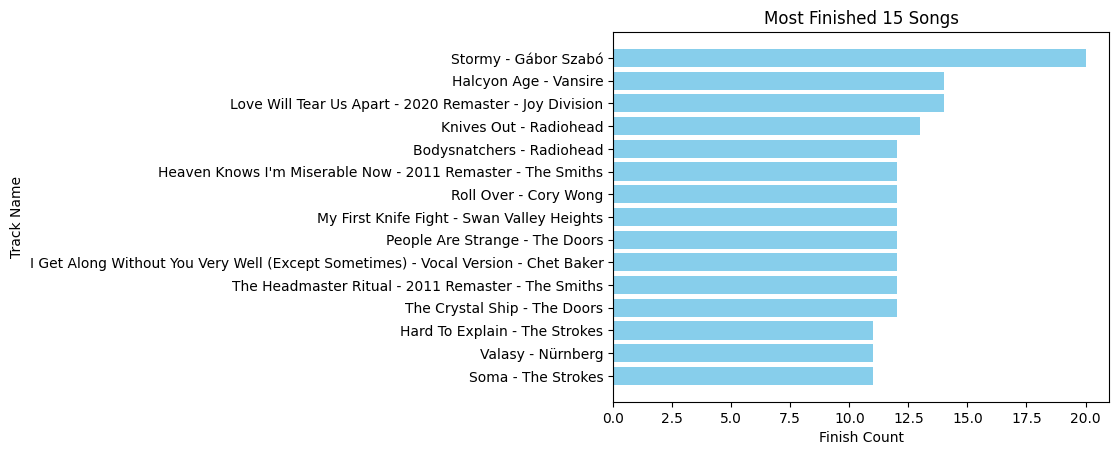

In [127]:
x=Top_15_finished["track_label"]
y=Top_15_finished["spotify_track_uri"]

plt.title("Most Finished 15 Songs")
plt.xlabel("Finish Count")
plt.ylabel("Track Name")

plt.barh(x[::-1], y[::-1], color="skyblue") 
plt.show()

In [ ]:
#Interesting, my top 3 most finished songs don't belong to my top listened artists
#There are also other interesting trend killers like Roll Over, My First Knife Fight, People Are Strange and Valasy

## Picked Tracks

In [ ]:
#To find the song I pick the most, I can use reason_starts' clickrow and playbutton. Maybe we can also add backbtn as well.
#To test this, we will create two variables, one with backbtn and one without backbtn

In [31]:
#Variable without backbtn
df_picked=df_track[df_track["reason_start"]=="clickrow"]

In [33]:
#Before we check the trends, we combine track and artist name for visualization
df_picked["track_label"] = df_picked.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)

C:\Users\New PC 3\AppData\Local\Temp\ipykernel_2616\1894088652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_picked["track_label"] = df_picked.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)


In [35]:
top_15_picked=df_picked.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

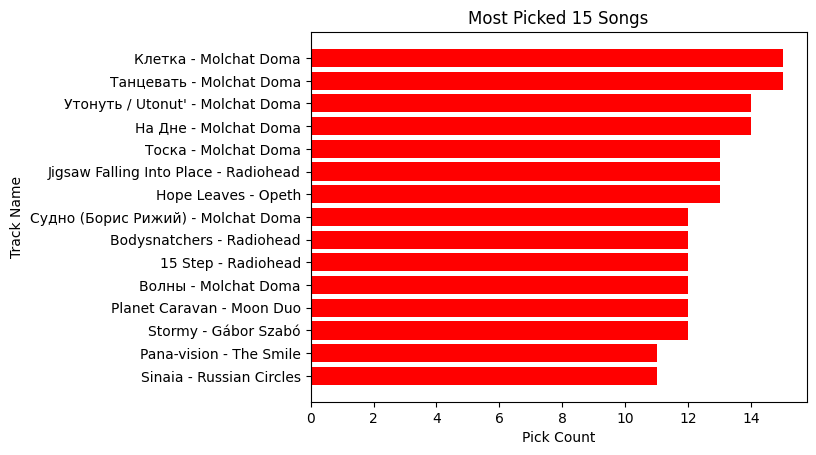

In [37]:
x=top_15_picked["track_label"]
y=top_15_picked["spotify_track_uri"]

plt.title("Most Picked 15 Songs")
plt.xlabel("Pick Count")
plt.ylabel("Track Name")

plt.barh(x[::-1], y[::-1], color="red") 
plt.show()

In [41]:
#Query with backbtn
df_picked_back=df_track[(df_track["reason_start"]=="clickrow") | (df["reason_start"]=="backbtn")]
df_picked_back15=df_picked_back.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

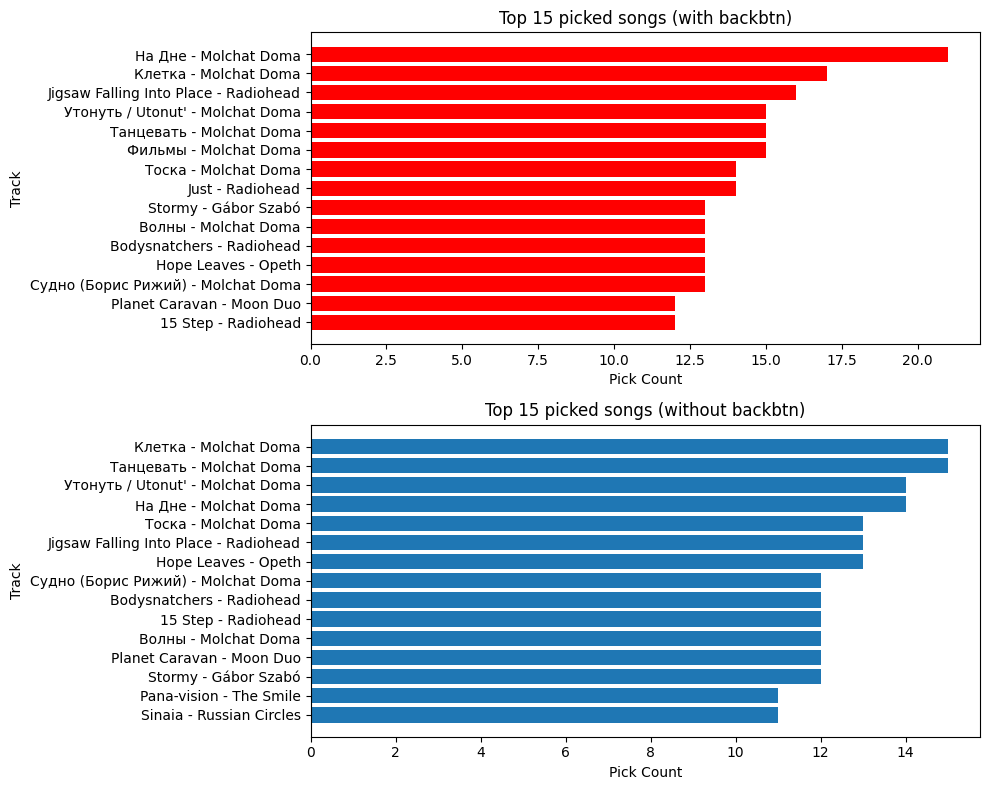

In [45]:
#Let's compare Query with backbtn and without backbtn
#df_picked_back top_15_picked
plt.figure(figsize=(10, 8))
#Plot 1 with backbtn
x=df_picked_back15["track_label"]
y=df_picked_back15["spotify_track_uri"] 
plt.subplot(2, 1, 1)
plt.barh(x[::-1], y[::-1], color = "red")
plt.title("Top 15 picked songs (with backbtn)")
plt.xlabel("Pick Count")
plt.ylabel("Track")

#Plot 2 without backbtn
x=top_15_picked["track_label"]
y=top_15_picked["spotify_track_uri"]
plt.subplot(2, 1, 2)
plt.barh(x[::-1], y[::-1])
plt.title("Top 15 picked songs (without backbtn)")
plt.xlabel("Pick Count")
plt.ylabel("Track")


plt.tight_layout()
plt.show()

In [ ]:
#When listening to songs in shuffle, we tend to press forward rapidly to find a song we like, 
#I feel like if we skip and return back to it, it can be count as a song picked.

#But I am not sure :/. So here's an infographic about both.
#As we can see, I tend to pick some tracks from Molchat Doma and Radiohead regularly.

## Skipped Tracks

In [ ]:
#To find the song I skip the most I can use skipped reason_end's (endplay, backbtn, fwdbtn, clickrow) values

In [90]:
df_track["track_label"] = df_track.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)

In [51]:
df_track.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,track_label
0,2FZ99j224ohiGLavqjijza,2024-05-14 20:42:07,android,910,Undertale,Toby Fox,UNDERTALE Soundtrack,fwdbtn,fwdbtn,True,True,Undertale - Toby Fox
1,0FZvr22qlD6sEJ0RDJWmvE,2024-05-14 20:42:08,android,963,Supertwister,Camel,Mirage,fwdbtn,fwdbtn,True,True,Supertwister - Camel
2,02ppMPbg1OtEdHgoPqoqju,2024-05-14 20:42:10,android,786,Reckoner,Radiohead,In Rainbows,fwdbtn,fwdbtn,True,True,Reckoner - Radiohead
3,1XmCjUHKK7wqOfSQeiZiUd,2024-05-14 20:42:13,android,3463,Tsitsushka,Thy Catafalque,Naiv,fwdbtn,fwdbtn,True,True,Tsitsushka - Thy Catafalque
4,3cLVFyJRYkpXVVIgjiePmj,2024-05-14 20:42:14,android,1072,Dois Animais Na Selva Suja Da Rua,Erasmo Carlos,"Carlos, Erasmo",fwdbtn,fwdbtn,True,True,Dois Animais Na Selva Suja Da Rua - Erasmo Carlos


In [16]:
#Creating a variable with reason_end's (endplay, backbtn, fwdbtn, clickrow) values
df_skip=df_track[(df_track["reason_end"]=="clickrow") | (df_track["reason_start"]=="backbtn") | (df_track["reason_start"]=="endplay") | (df_track["reason_start"]=="fwdbtn")]

In [111]:
#Picking the top 15 skipped
skip_15=df_skip.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

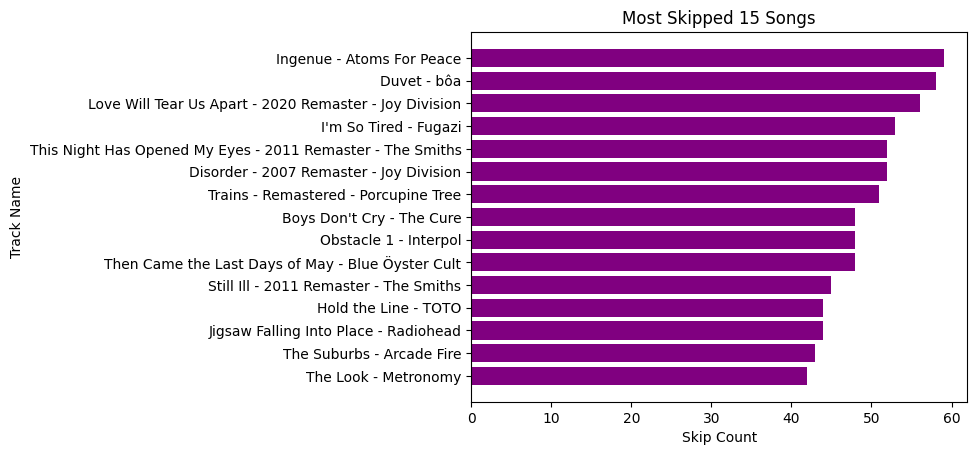

In [113]:
x=skip_15["track_label"]
y=skip_15["spotify_track_uri"]

plt.title("Most Skipped 15 Songs")
plt.xlabel("Skip Count")
plt.ylabel("Track Name")

plt.barh(x[::-1], y[::-1], color="purple") 
plt.show()

In [115]:
#I mostly press forward button towards the end of the song. We can check if ms played is above or below average
df_track["ms_played"].mean()

53673.259118085545

In [62]:
#Let's filter by ms_played lower than 53673.259118085545
df_end_avg=df_skip[df_skip["ms_played"]<53673.259118085545]

In [64]:
skip_15=df_skip.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

In [66]:
avg_15=df_end_avg.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values(["spotify_track_uri"], ascending=False).reset_index().head(15)

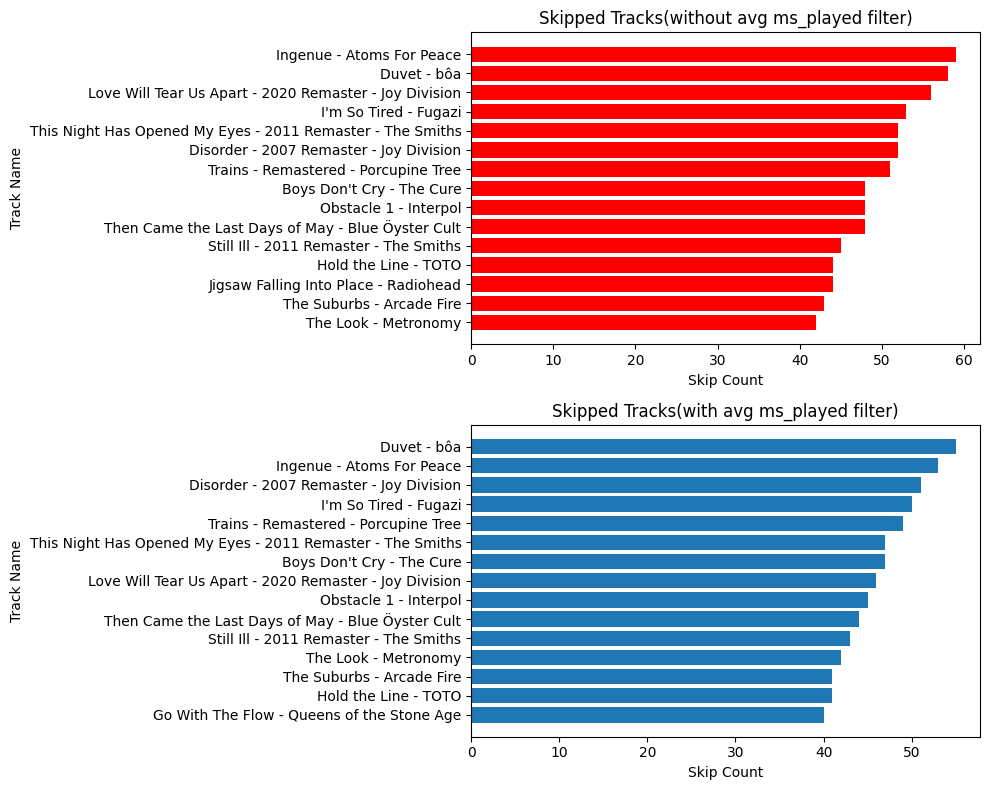

In [70]:
#Let's compare df_end_avg and skip_15 df_end_avg
plt.figure(figsize=(10, 8))
#Plot 1
x=skip_15["track_label"]
y=skip_15["spotify_track_uri"] 
plt.subplot(2, 1, 1)
plt.barh(x[::-1], y[::-1], color = "red")
plt.title("Skipped Tracks(without avg ms_played filter)")
plt.xlabel("Skip Count")
plt.ylabel("Track Name")

#Plot 2
x=avg_15["track_label"]
y=avg_15["spotify_track_uri"]
plt.subplot(2, 1, 2)
plt.barh(x[::-1], y[::-1])
plt.title("Skipped Tracks(with avg ms_played filter)")
plt.xlabel("Skip Count")
plt.ylabel("Track Name")


plt.tight_layout()
plt.show()

## Skipped Track Correlation Seeking

### Skip - Shuffle Correlation

In [59]:
#Are there any correlation between shuffle data and skipped tracks data?
# What are the top shuffled songs? (Take shuffle bool as your parameter)

#Let's create a variable, taking shuffled data
df_shuffled=df[df["shuffle"]==True]
df_shuffled["track_label"] = df_shuffled.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)
df_shuffled_15=df_shuffled.groupby(['track_label']).agg({"spotify_track_uri":"count"}).sort_values("spotify_track_uri", ascending=False).reset_index().head(15)

C:\Users\New PC 3\AppData\Local\Temp\ipykernel_2616\1489891026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shuffled["track_label"] = df_shuffled.apply(lambda row: f"{row['track_name']} - {row['artist_name']}", axis=1)


In [61]:
df_shuffled_15.head()

,track_label,spotify_track_uri
0,Trains - Remastered - Porcupine Tree,58
1,Bad Moon Rising - Creedence Clearwater Revival,51
2,Hold the Line - TOTO,49
3,Long Flight - Human Tetris,49
4,Disorder - 2007 Remaster - Joy Division,48


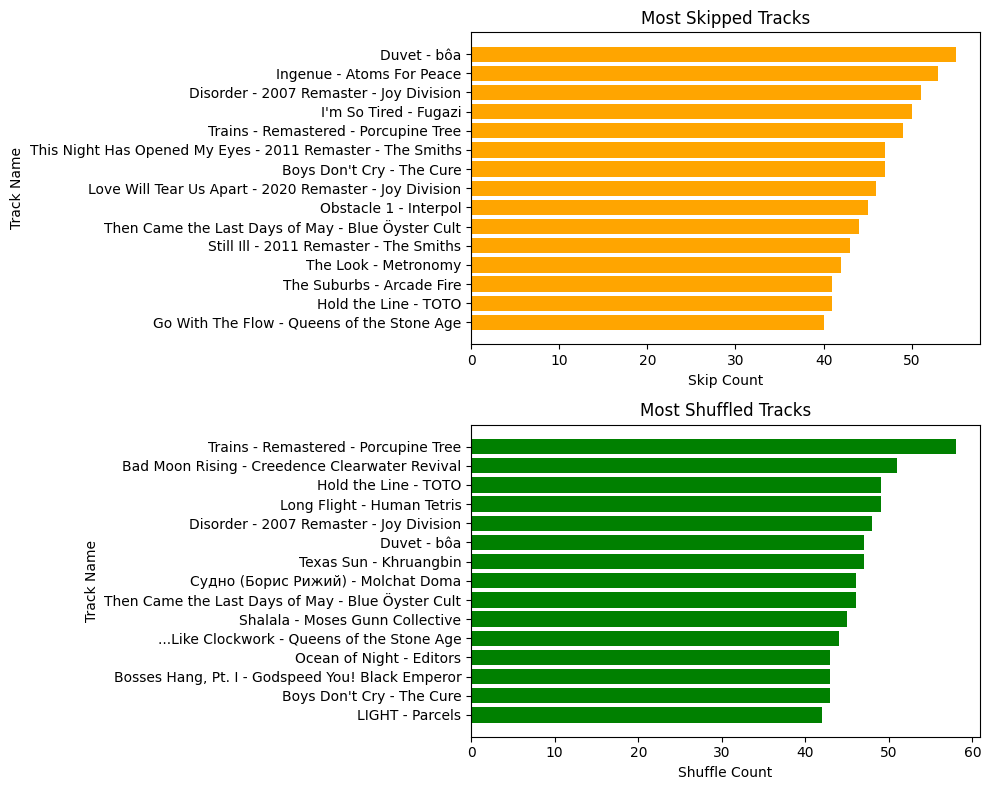

In [81]:
#Is there a correlation between most skipped songs and shuffle==True?
plt.figure(figsize=(10, 8))
#Plot 1
x=avg_15["track_label"]
y=avg_15["spotify_track_uri"]
plt.subplot(2, 1, 1)
plt.barh(x[::-1], y[::-1], color = "orange")
plt.title("Most Skipped Tracks")
plt.xlabel("Skip Count")
plt.ylabel("Track Name")

#Plot 2
x=df_shuffled_15["track_label"]
y=df_shuffled_15["spotify_track_uri"]
plt.subplot(2, 1, 2)
plt.barh(x[::-1], y[::-1], color = "green")
plt.title("Most Shuffled Tracks")
plt.xlabel("Shuffle Count")
plt.ylabel("Track Name")


plt.tight_layout()
plt.show()

In [ ]:
#Skipped tracks which are also in most shuffled
#duvet - boa, disorder - joy division, trains - porcupine tree, boys dont cry - the cure
#then came the last days of may - blue öyster cult, hold the line - toto
#6 of the top 15 skipped songs are in the most shuffled tracks list

In [102]:
#Is there a correlation between most skipped tracks and reason_start==“playbtn” - The user pressed Play on a playlist or other list of tracks
tracks_playbtn=df_track[df_track["reason_start"]=="playbtn"]
playbtn_count=tracks_playbtn.groupby(["track_label"]).agg({"spotify_track_uri":"count"}).sort_values("spotify_track_uri", ascending=False).reset_index().head(15)

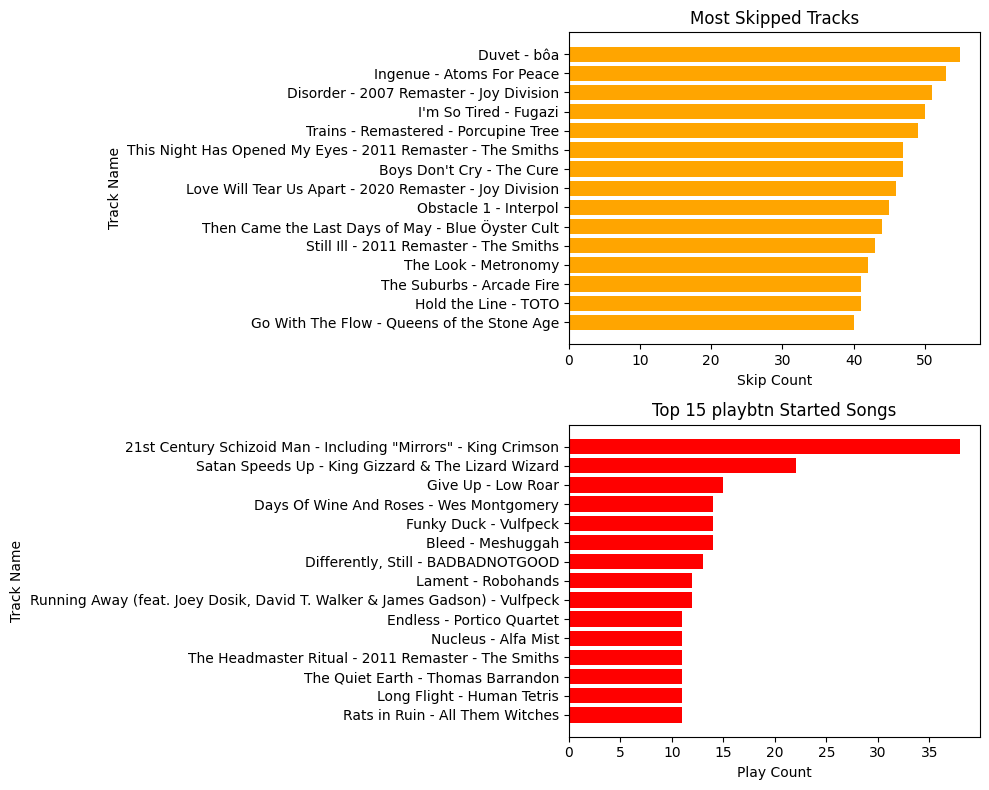

In [111]:
plt.figure(figsize=(10, 8))
#Plot 1
x=avg_15["track_label"]
y=avg_15["spotify_track_uri"]
plt.subplot(2, 1, 1)
plt.barh(x[::-1], y[::-1], color = "orange")
plt.title("Most Skipped Tracks")
plt.xlabel("Skip Count")
plt.ylabel("Track Name")

#Plot 2
x=playbtn_count["track_label"]
y=playbtn_count["spotify_track_uri"]
plt.subplot(2, 1, 2)
plt.barh(x[::-1], y[::-1], color = "red")
plt.title("Top 15 playbtn Started Songs")
plt.xlabel("Play Count")
plt.ylabel("Track Name")


plt.tight_layout()
plt.show()

In [ ]:
##It looks like there is no correlation between playbtn and skip

# New Artist vs All-Time Favorites

In [168]:
#Finding the latest time our user listened to music
df["ts"].max()

Timestamp('2025-02-18 22:17:27')

In [184]:
#Finding the latest play date for every song listened
latest_played=df.groupby("artist_name").agg({"ts":"max", "ms_played":"sum"}).sort_values("ts", ascending=False).reset_index()
latest=latest_played.head(15)

In [182]:
#Finding top artists again for visualization
tops=df.groupby("artist_name").agg({"ms_played":"sum"}).sort_values("ms_played", ascending=False).reset_index()
top2=tops.head(15)

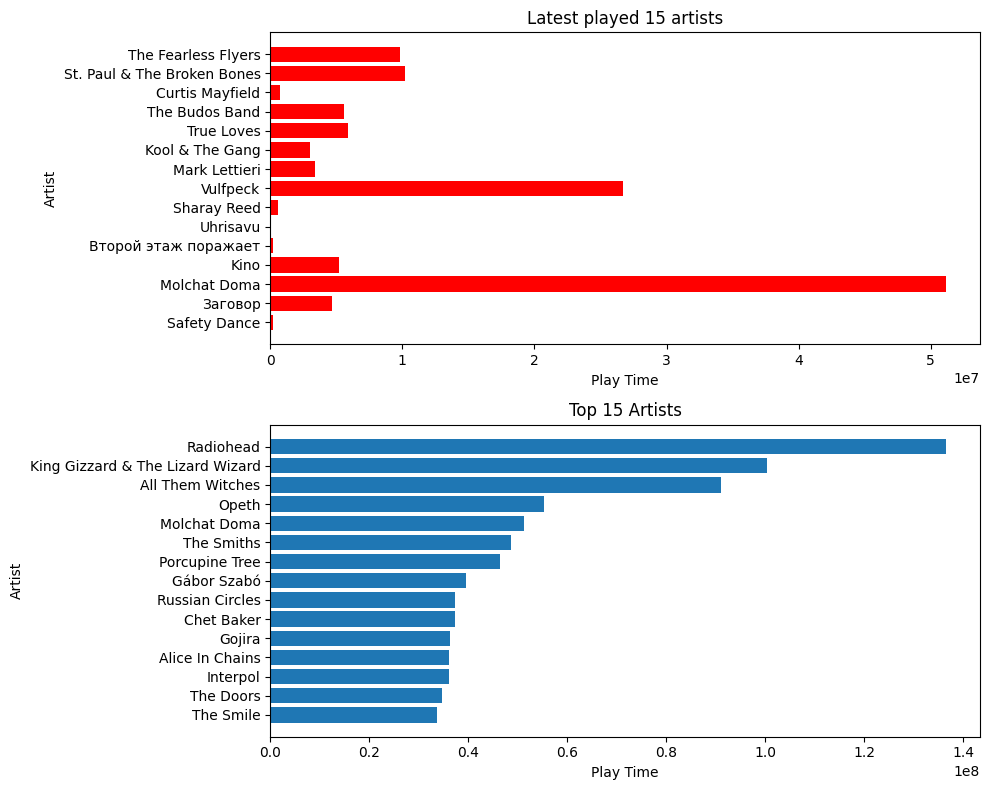

In [180]:
#Visualizing Latest played artists vs top played artists

plt.figure(figsize=(10, 8))
#Plot 1
x=latest["artist_name"]
y=latest["ms_played"] 
plt.subplot(2, 1, 1)
plt.barh(x[::-1], y[::-1], color = "red")
plt.title("Latest played 15 artists")
plt.xlabel("Play Time")
plt.ylabel("Artist")

#Plot 2
x=top2["artist_name"]
y=top2["ms_played"]
plt.subplot(2, 1, 2)
plt.barh(x[::-1], y[::-1])
plt.title("Top 15 Artists")
plt.xlabel("Play Time")
plt.ylabel("Artist")


plt.tight_layout()
plt.show()

In [ ]:
#My listening trends seem to be a bit more leaning to discovery. I try new artists regularly
#My discovery trend is, if I like a song, I check out the band for a while. Some of them sticks with me and becomes an all time favorite
#Even though I lean to discovery, I return back to some of my top artists like Molchat Doma regularly.